# Objective

This assignment is a programming assignment wherein we have to build a multiple linear regression model for the prediction of car prices. 

## Problem Statement

A Chinese automobile company ```Geely Auto``` aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 

 
They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

1. ***Which variables are significant in predicting the price of a car***
2. ***How well those variables describe the price of a car***
3. ***Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the Americal market.***

## Business Goal 

1. To model the price of cars with the available independent variables. 
2. It will be used by the management to understand how exactly the prices vary with the independent variables. 
3. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. 
4. Further, the model will be a good way for management to understand the pricing dynamics of a new market. 

In [1]:
#importing required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

### Step 1:  Read and Understand the Data

In the following steps, we will read the Car prices CSV and try to understand the various aspects of the data.

In [3]:
#Read the csv file using pandas read_csv method
car_sales = pd.read_csv("CarPrice_Assignment.csv")

#Setting to display all the columns
pd.set_option('display.max_columns', None)

In [4]:
#browse through the first 5 rows and all the columns of the data to get a feel of the data
car_sales.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
#Querying about the information of the data set using .info()
car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

As seen from the above info, we don't have any missing values across rows and columns.<br>
Hence we *don't need to treat any missing values*

In [6]:
#Inspecting the rows and columns count of the given data set
car_sales.shape

(205, 26)

In [7]:
#Describing the data statistically
car_sales.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [8]:
#Conversion of Data Types
#fetching the unique values of doornumber and cylindernumber to convert them into numeric
print(car_sales.cylindernumber.unique())
print(car_sales.doornumber.unique())

['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
['two' 'four']


In [9]:
#We can convert DoorNumber and CylinderNumber into numerical values from categorical values
car_sales.doornumber.replace(to_replace=['two','four'],
                          value=[2,4],inplace=True)
car_sales.cylindernumber.replace(to_replace=['four','six','five','three','twelve','two','eight'],
                                 value=[4,6,5,3,12,2,8],inplace=True)

In [10]:
#Considering Company Name from Car Name
#Splitting the car name from company name by selecting only the zeroth index
car_sales['Company'] = car_sales.CarName.str.split(expand=True)[0]

In [11]:
#Dropping the CarName column as we have derived the company name out of it
car_sales.drop('CarName',axis=1,inplace=True)

### Step 2: Visualising the Data

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

**Please Note** : If the pair plot took long time to generate, please use this [link](PairPlot_Output.png) to view the image. 

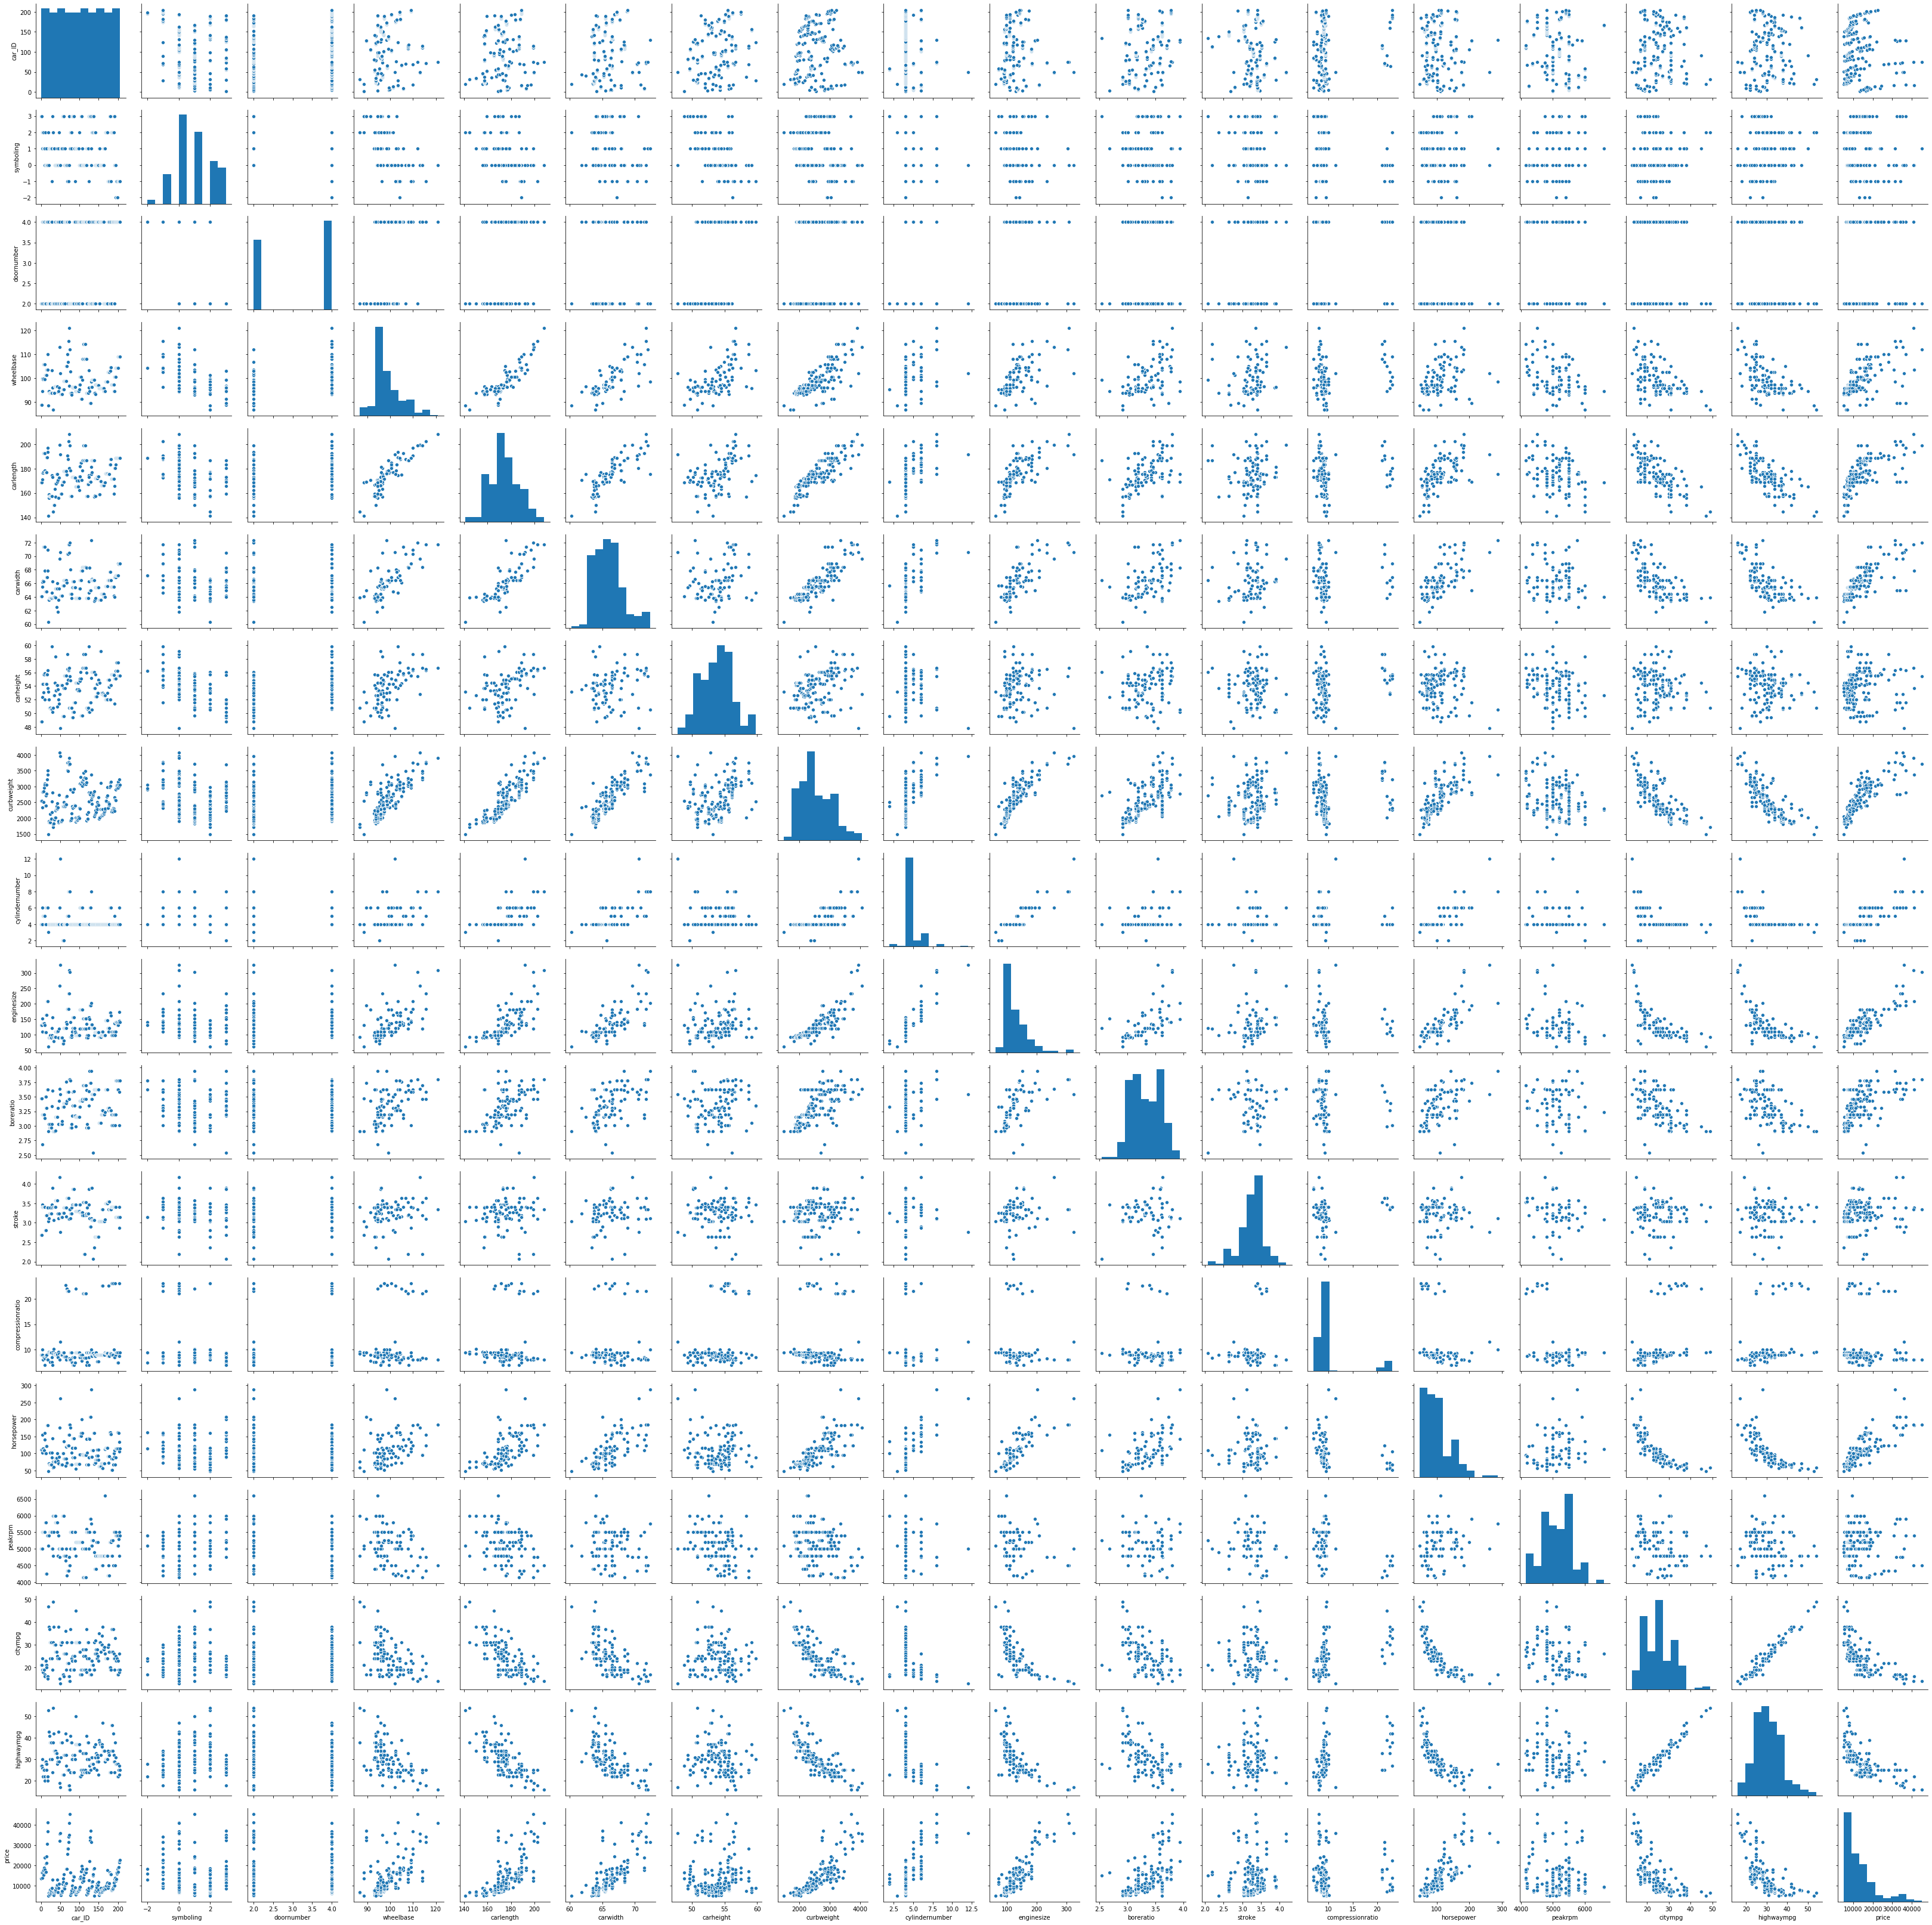

In [12]:
sns.pairplot(car_sales)
plt.show()

It is too hard to visualise using pair plot given the number of variables. Hence we can perform univariate analysis of each column against our dependent column.

Starting with categorical columns

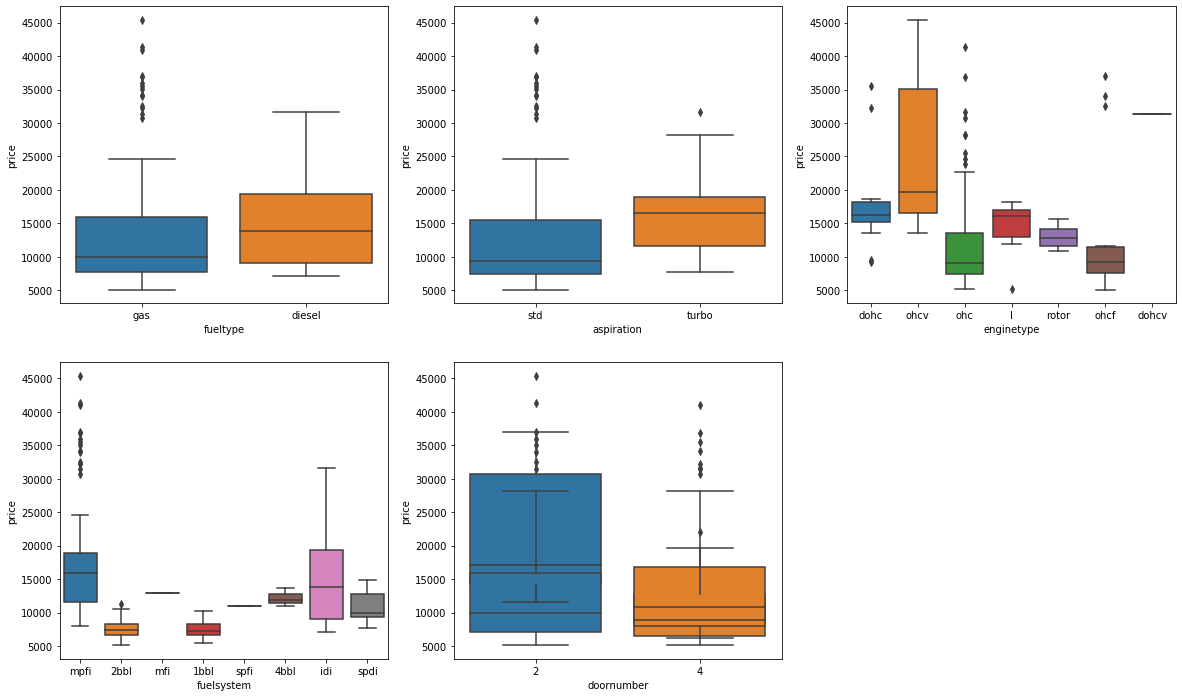

In [13]:
  plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'fueltype', y = 'price', data = car_sales)
plt.subplot(2,3,2)
sns.boxplot(x = 'aspiration', y = 'price', data = car_sales)
plt.subplot(2,3,3)
sns.boxplot(x = 'enginetype', y = 'price', data = car_sales)
plt.subplot(2,3,4)
sns.boxplot(x = 'fuelsystem', y = 'price', data = car_sales)
plt.subplot(2,3,5)
sns.boxplot(x = 'carbody', y = 'price', data = car_sales)
plt.subplot(2,3,5)
sns.boxplot(x = 'doornumber', y = 'price', data = car_sales)

plt.show()

### Insights from Box Plots

1. Based on fuel type, median of diesel cars are priced higher than median of gas cars. Having said that, we also see `outliers` in gas segment
2. Among turbo and standard, most of the turbo aspiration cars are priced higher than it's counterpart. Here too, we see some `outliers` in standard category
3. Cars with engine type ohcv are highly priced, followed by ohc. 
4. Cars with hard top car body are priced variedly and is distributed across price

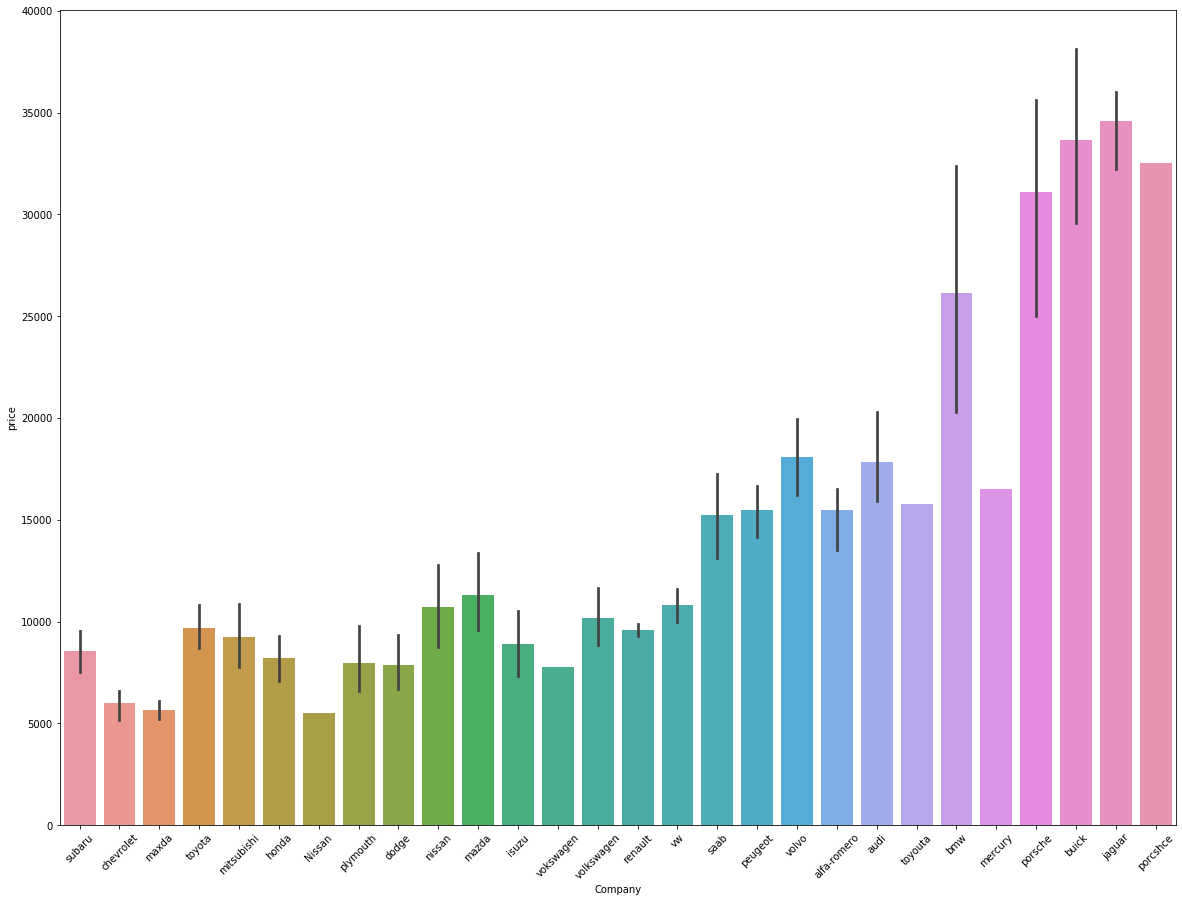

In [14]:
#Visualising the company's influence on Price
plt.figure(figsize=(20,15))
sns.barplot(x = 'Company', y = 'price', data = car_sales.sort_values('price'))
plt.xticks(rotation=45)
plt.show()

`From the above graph, we can see that we have different same company names worded differently. Hence those needs correction for accurate results` <br> For example: <br> 1. porsche and porcshce <br> 2. toyota and toyouta etc

In [15]:
print(car_sales.Company.unique())

['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'maxda' 'mazda' 'buick' 'mercury' 'mitsubishi' 'Nissan' 'nissan'
 'peugeot' 'plymouth' 'porsche' 'porcshce' 'renault' 'saab' 'subaru'
 'toyota' 'toyouta' 'vokswagen' 'volkswagen' 'vw' 'volvo']


The differently spelt but same company names are <br>
1. maxda and mazda
2. Nissan and nissan
3. porsche and porcshce
4. toyota and toyouta
5. vokswagen and volkswagen
<br>
<br>
The above differently worded names needs to be replaced with single name.
<br>
It is also important to note that we have a seperate company called vw. The model names used for this category are Rabbit and Dasher <br> Upon searching in Google, it is revealed that both these models (Rabbit and Dasher) are models of volkswagen. Hence replacing vw with volkswagen

In [16]:
#Replacing company names
car_sales.Company.replace(to_replace=['maxda','Nissan','porcshce','toyouta','vokswagen','vw'],
                          value=['mazda','nissan','porsche','toyota','volkswagen','volkswagen'],inplace=True)

In [17]:
#Checking whether the incorrect names have been replaced
print(car_sales.Company.unique())

['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot' 'plymouth'
 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen' 'volvo']


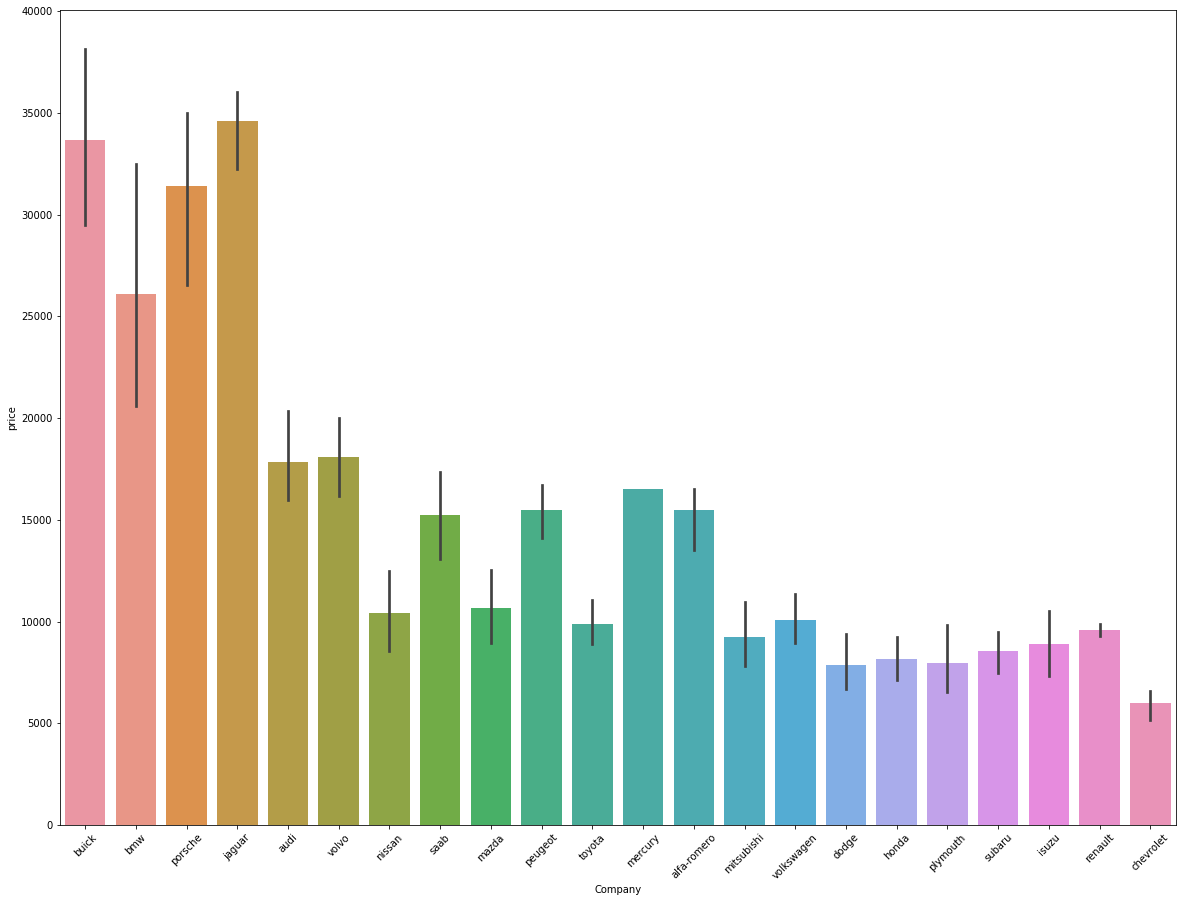

In [18]:
#As seen from above print result, the incorrect values have been replaced with actual values
#Plotting the bar plot again
plt.figure(figsize=(20,15))
sns.barplot(x = 'Company', y = 'price', data = car_sales.sort_values('price',ascending=False))
plt.xticks(rotation=45)
plt.show()

### Insights from Price vs Company Plot

1. Buick company cars are priced the highest and chevrolet the least
2. There are currently 22 car companies in US
3. They are spread from making high end cars and then medium range cars and economical cars

##### Pandas Profiling Analysis

1. We use the pandas profiling to perform a quick EDA on the given data set, understand it's correlation and observations.
2. The report is saved to a html file **car_sales.html** which can be accessed from [here](car_sales.html)

In [19]:
#Using pandas profiling for finding interesting insights amongst variables
from pandas_profiling import ProfileReport
profile = ProfileReport(car_sales)
profile.to_file(output_file="car_sales.html")

### Insights

#### Price

1. *Most of the car sold are in economical price bracket with more than 80 observations in the price segment of 5000-10000*
2. *In terms of selling,Cars in the price segment of around 35000 fare better than cars in the 25000 price segment. This could be because of extra features that additional 10k brings and the customers not bothered about shelling additional 10k*
3. *There is only one car each sold at 45400 dollars, 41315 dollars, 40960 dollars, 37028 dollars and 36880 dollars. This outlier is identified by clicking on Maximum 5 values of price variable under Extreme Values section of pandas profiling*
4. *Median of the prices for the sold cars remain at 10295*

#### Symboling

1. *Based on the symboling, we can conclude that most of the cars (60+ transactions) sold have the risk rating of 0-1, which indicates* **customers are more inclined towards nominal safety rating of the car and also not to shell out more money for additional safety**

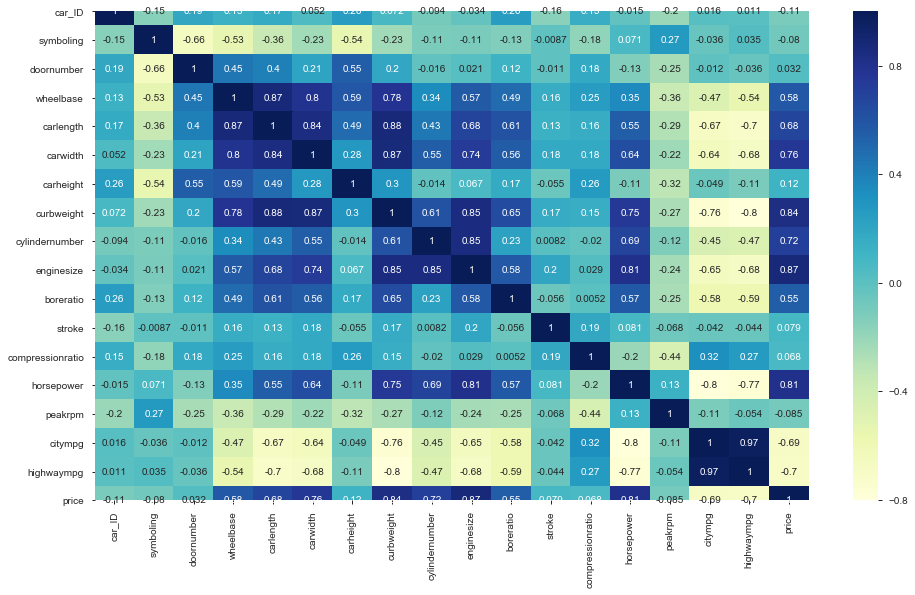

In [20]:
#Finding the correlations between numerical variables and plotting a heat map against it
corr = car_sales.corr()
plt.figure(figsize=(16,9))
sns.heatmap(corr,annot=True,cmap="YlGnBu")

### Insights from Pandas Profiling and the generated heat map

1. Price (Dependent variable) is highly `positively correlated` with Horse power, car width, curbweight and Engine Size
2. Price (Dependent variable) is highly `negatively correlated` with highwaympg and citympg

**Based on this we can infer that more the mileage, lower the price of the car**. <br>
**Similarly higher the horse power and car dimensions (width, weight, engine size) , higher is the price**

### Dummy Variables

The categorical variables  needs to convert into integer as well. 

For this, we will use something called `dummy variables`.

As fuelsystem is highly correlated with fuel type, we are ignoring that column for dummies. Ultimately the fuelsystem will be dropped

In [21]:
Categorical = ['fueltype','aspiration','carbody','drivewheel','enginelocation','enginetype','Company']

#We are dropping the first columns of dummies as we could express the n categorical columns using n-1 numerical columns
#For example Fuel Type - A value of 1 indicates Gas and value of 0 indicates Diesel.
#Similarly Aspiration - A value of 1 indicates Standard and 0 indicates Turbo.

to_num = pd.get_dummies(car_sales[Categorical],drop_first = True)

In [23]:
#previewing the dummies data frame. That is numerical values of equivalent categorical values
to_num.head()

,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,Company_audi,Company_bmw,Company_buick,Company_chevrolet,Company_dodge,Company_honda,Company_isuzu,Company_jaguar,Company_mazda,Company_mercury,Company_mitsubishi,Company_nissan,Company_peugeot,Company_plymouth,Company_porsche,Company_renault,Company_saab,Company_subaru,Company_toyota,Company_volkswagen,Company_volvo
0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [24]:
#Concatentating two dataframe together to a single data frame
car_sales_num = pd.concat([car_sales, to_num], axis = 1)

In [25]:
#previewing the updated data set
car_sales_num.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,Company_audi,Company_bmw,Company_buick,Company_chevrolet,Company_dodge,Company_honda,Company_isuzu,Company_jaguar,Company_mazda,Company_mercury,Company_mitsubishi,Company_nissan,Company_peugeot,Company_plymouth,Company_porsche,Company_renault,Company_saab,Company_subaru,Company_toyota,Company_volkswagen,Company_volvo
0,1,3,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,3,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,1,gas,std,2,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,2,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,2,gas,std,4,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Step 3: Data Preparation
1. Now we can remove the categorical columns as we already have encoded them to numeric using dummies
2. Also removing fuel system as fuel system is highly correlated with fueltype and we already have dummies for fuel type (These are based upon the results that we observed in heatmap)
3. Also removing citympg as citympg is highly correlated with highwaympg (These are based upon the results that we observed in heatmap)
4. Similarly removing symboling, carID, doornumber, stroke,compressionratio,peakrpm columns as they are not really correlated with price column (These are based upon the results that we observed in heatmap)

In [26]:
#dropping the columns as indicated in above markdown cell
columns_to_drop = ['fueltype','aspiration','carbody','drivewheel',
                   'enginelocation','enginetype','fuelsystem','symboling',
                   'car_ID','doornumber','stroke','compressionratio','peakrpm','citympg','Company']
car_sales_num.drop(columns_to_drop,axis=1,inplace=True)

In [27]:
#previewing the updated data frame
car_sales_num.head()

,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,horsepower,highwaympg,price,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,Company_audi,Company_bmw,Company_buick,Company_chevrolet,Company_dodge,Company_honda,Company_isuzu,Company_jaguar,Company_mazda,Company_mercury,Company_mitsubishi,Company_nissan,Company_peugeot,Company_plymouth,Company_porsche,Company_renault,Company_saab,Company_subaru,Company_toyota,Company_volkswagen,Company_volvo
0,88.6,168.8,64.1,48.8,2548,4,130,3.47,111,27,13495.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,88.6,168.8,64.1,48.8,2548,4,130,3.47,111,27,16500.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,94.5,171.2,65.5,52.4,2823,6,152,2.68,154,26,16500.0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,99.8,176.6,66.2,54.3,2337,4,109,3.19,102,30,13950.0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,99.4,176.6,66.4,54.3,2824,5,136,3.19,115,22,17450.0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [28]:
print('The rows and columns of the modified data set is',car_sales_num.shape)

The rows and columns of the modified data set is (205, 47)


In [29]:
#information about the data set
car_sales_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 47 columns):
wheelbase              205 non-null float64
carlength              205 non-null float64
carwidth               205 non-null float64
carheight              205 non-null float64
curbweight             205 non-null int64
cylindernumber         205 non-null int64
enginesize             205 non-null int64
boreratio              205 non-null float64
horsepower             205 non-null int64
highwaympg             205 non-null int64
price                  205 non-null float64
fueltype_gas           205 non-null uint8
aspiration_turbo       205 non-null uint8
carbody_hardtop        205 non-null uint8
carbody_hatchback      205 non-null uint8
carbody_sedan          205 non-null uint8
carbody_wagon          205 non-null uint8
drivewheel_fwd         205 non-null uint8
drivewheel_rwd         205 non-null uint8
enginelocation_rear    205 non-null uint8
enginetype_dohcv       205 non-null uint8
e

### Step 4: Splitting the Data into Training and Testing Sets

Splitting the data set in to train-test split.

In [30]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
#Setting the train size as 80% and test size as 20%
np.random.seed(0)
car_train, car_test = train_test_split(car_sales_num, train_size = 0.8, test_size = 0.2, random_state = 100)

In [31]:
print('The rows and columns of the train data set is',car_train.shape)
print('The rows and columns of the test data set is',car_test.shape)

The rows and columns of the train data set is (164, 47)
The rows and columns of the test data set is (41, 47)


#### Performing Scaling on the Train Data

Scaling is really important as we are working with variables of different scales. <br>
Here we are to use min max scaling

In [32]:
#importing minmaxscaler from sklearn library
from sklearn.preprocessing import MinMaxScaler

In [33]:
#initialising the scaler object
scaler = MinMaxScaler()

In [34]:
# Apply scaler() to all the numerical columns except the  'dummy' variables
#As you can notice we are using fit_transform on train data. While using the test data, we will just transform the test data
columns_to_consider = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'cylindernumber', 'enginesize', 'boreratio', 'horsepower', 'highwaympg','price']

car_train[columns_to_consider] = scaler.fit_transform(car_train[columns_to_consider])

In [35]:
#Again previewing the data
car_train.head()

,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,horsepower,highwaympg,price,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,Company_audi,Company_bmw,Company_buick,Company_chevrolet,Company_dodge,Company_honda,Company_isuzu,Company_jaguar,Company_mazda,Company_mercury,Company_mitsubishi,Company_nissan,Company_peugeot,Company_plymouth,Company_porsche,Company_renault,Company_saab,Company_subaru,Company_toyota,Company_volkswagen,Company_volvo
3,0.455172,0.577236,0.491667,0.541667,0.329325,0.2,0.181132,0.404762,0.225000,0.351351,0.243998,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
157,0.313793,0.409756,0.341667,0.416667,0.240884,0.2,0.139623,0.404762,0.091667,0.540541,0.057463,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
81,0.334483,0.518699,0.425000,0.133333,0.325834,0.2,0.230189,0.531746,0.166667,0.405405,0.093406,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
32,0.244828,0.144715,0.308333,0.400000,0.135376,0.2,0.067925,0.182540,0.050000,0.675676,0.007763,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
99,0.365517,0.525203,0.408333,0.575000,0.324282,0.2,0.222642,0.515873,0.204167,0.459459,0.105838,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [36]:
#Describing the train set
car_train.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,horsepower,highwaympg,price,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,Company_audi,Company_bmw,Company_buick,Company_chevrolet,Company_dodge,Company_honda,Company_isuzu,Company_jaguar,Company_mazda,Company_mercury,Company_mitsubishi,Company_nissan,Company_peugeot,Company_plymouth,Company_porsche,Company_renault,Company_saab,Company_subaru,Company_toyota,Company_volkswagen,Company_volvo
count,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.00000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.00000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.0,164.000000,164.000000,164.000000,164.000000,164.00000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000
mean,0.404605,0.519899,0.454726,0.482927,0.398579,0.237195,0.236493,0.489983,0.221037,0.385794,0.211153,0.896341,0.170732,0.02439,0.341463,0.469512,0.134146,0.628049,0.323171,0.012195,0.006098,0.054878,0.719512,0.079268,0.054878,0.02439,0.042683,0.036585,0.030488,0.018293,0.054878,0.067073,0.018293,0.018293,0.085366,0.0,0.067073,0.091463,0.048780,0.030488,0.02439,0.012195,0.018293,0.067073,0.146341,0.067073,0.036585
std,0.197731,0.197651,0.179980,0.205820,0.202330,0.109743,0.148945,0.203913,0.164011,0.188116,0.212491,0.305751,0.377427,0.15473,0.475653,0.500598,0.341853,0.484806,0.469120,0.110092,0.078087,0.228440,0.450613,0.270984,0.228440,0.15473,0.202760,0.188317,0.172452,0.134418,0.228440,0.250915,0.134418,0.134418,0.280281,0.0,0.250915,0.289150,0.216069,0.172452,0.15473,0.110092,0.134418,0.250915,0.354531,0.250915,0.188317
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.272414,0.409756,0.308333,0.341667,0.247673,0.200000,0.135849,0.293651,0.090625,0.216216,0.070475,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.341379,0.502439,0.425000,0.491667,0.347944,0.200000,0.184906,0.468254,0.183333,0.378378,0.132856,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.475862,0.615041,0.516667,0.641667,0.522789,0.200000,0.287736,0.682540,0.283333,0.540541,0.295349,1.000000,0.000000,0.00000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1

#### Dividing into X and Y sets for the model building

In [37]:
#Popping out the price feature for y_train
y_train = car_train.pop('price')
X_train = car_train

### Step 5: Building our model

We are to use RFE (Recursive Feature Elimination) to identify the top 15 arbitary features and then manually analyse them to arrive at an good model for train data. <br> In short, we are to follow `mixed approach` to build our model

In [38]:
#import RFE from sklearn packages
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [39]:
#initialising the method and selecting top 15 features from RFE
lm = LinearRegression()
lm.fit(X_train,y_train)

rfe = RFE(lm,15)
rfe = rfe.fit(X_train,y_train)

In [40]:
#listing the rfe features and their ranking
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('wheelbase', False, 10),
 ('carlength', False, 12),
 ('carwidth', True, 1),
 ('carheight', False, 13),
 ('curbweight', True, 1),
 ('cylindernumber', False, 5),
 ('enginesize', False, 4),
 ('boreratio', True, 1),
 ('horsepower', True, 1),
 ('highwaympg', False, 6),
 ('fueltype_gas', False, 22),
 ('aspiration_turbo', False, 19),
 ('carbody_hardtop', True, 1),
 ('carbody_hatchback', True, 1),
 ('carbody_sedan', True, 1),
 ('carbody_wagon', True, 1),
 ('drivewheel_fwd', False, 27),
 ('drivewheel_rwd', False, 28),
 ('enginelocation_rear', True, 1),
 ('enginetype_dohcv', False, 18),
 ('enginetype_l', True, 1),
 ('enginetype_ohc', False, 23),
 ('enginetype_ohcf', False, 9),
 ('enginetype_ohcv', False, 30),
 ('enginetype_rotor', False, 3),
 ('Company_audi', False, 7),
 ('Company_bmw', True, 1),
 ('Company_buick', True, 1),
 ('Company_chevrolet', False, 20),
 ('Company_dodge', False, 16),
 ('Company_honda', False, 21),
 ('Company_isuzu', False, 29),
 ('Company_jaguar', True, 1),
 ('Company_ma

In [41]:
col = X_train.columns[rfe.support_]
col

Index(['carwidth', 'curbweight', 'boreratio', 'horsepower', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon',
       'enginelocation_rear', 'enginetype_l', 'Company_bmw', 'Company_buick',
       'Company_jaguar', 'Company_peugeot', 'Company_porsche'],
      dtype='object')

In [42]:
#selecting only the columns for which rfe returned true
X_train.columns[~rfe.support_]

Index(['wheelbase', 'carlength', 'carheight', 'cylindernumber', 'enginesize',
       'highwaympg', 'fueltype_gas', 'aspiration_turbo', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginetype_dohcv', 'enginetype_ohc',
       'enginetype_ohcf', 'enginetype_ohcv', 'enginetype_rotor',
       'Company_audi', 'Company_chevrolet', 'Company_dodge', 'Company_honda',
       'Company_isuzu', 'Company_mazda', 'Company_mercury',
       'Company_mitsubishi', 'Company_nissan', 'Company_plymouth',
       'Company_renault', 'Company_saab', 'Company_subaru', 'Company_toyota',
       'Company_volkswagen', 'Company_volvo'],
      dtype='object')

#### Building model using statsmodel, for the detailed statistics

In [43]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [44]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [45]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [46]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     167.2
Date:                Sun, 08 Mar 2020   Prob (F-statistic):           1.18e-84
Time:                        18:17:14   Log-Likelihood:                 258.55
No. Observations:                 164   AIC:                            -485.1
Df Residuals:                     148   BIC:                            -435.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0204    

In [47]:
#Bore ratio has the highest p value (ignoring constant) amongst the features. 
#Hence removing it to check whether the adjusted R squared increases

X_train_new = X_train_rfe.drop(["boreratio"], axis = 1)

In [48]:
#Adding constant to updated model and performing Ordinary Least Square Method
X_train_new = sm.add_constant(X_train_new)
lm1 = sm.OLS(y_train,X_train_new).fit()

In [49]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     173.7
Date:                Sun, 08 Mar 2020   Prob (F-statistic):           1.19e-84
Time:                        18:17:51   Log-Likelihood:                 255.65
No. Observations:                 164   AIC:                            -481.3
Df Residuals:                     149   BIC:                            -434.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0398    

In [50]:
# Calculate the VIFs for the above model
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Creating a new function vif as we repeatedly need to call this until we arrive at optimal model

def vif(X_train_new_vif):
    vif = pd.DataFrame()
    X = X_train_new_vif
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [51]:
#checking VIF for new train data after dropping bore ratio
vif(X_train_new)

,Features,VIF
0,const,47.35
6,carbody_sedan,10.79
13,Company_peugeot,10.45
5,carbody_hatchback,9.81
2,curbweight,9.78
9,enginetype_l,9.16
7,carbody_wagon,5.59
1,carwidth,5.11
3,horsepower,5.09
14,Company_porsche,2.62


As seen above, the VIF is pretty high for most of the features.
Dropping carbody_sedan column to see the influence it has on other columns

In [52]:
X_train_new = X_train_new.drop(['carbody_sedan'], axis=1)

In [53]:
#checking VIF for new train data after dropping carbody_sedan
vif(X_train_new)

,Features,VIF
0,const,14.77
12,Company_peugeot,10.44
2,curbweight,9.72
8,enginetype_l,9.15
3,horsepower,5.02
1,carwidth,4.85
13,Company_porsche,2.62
7,enginelocation_rear,2.42
10,Company_buick,1.65
11,Company_jaguar,1.47


In [54]:
#Checking the p value for the new train data
X_train_new = sm.add_constant(X_train_new)
lm2 = sm.OLS(y_train,X_train_new).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     172.1
Date:                Sun, 08 Mar 2020   Prob (F-statistic):           4.65e-83
Time:                        18:18:43   Log-Likelihood:                 248.72
No. Observations:                 164   AIC:                            -469.4
Df Residuals:                     150   BIC:                            -426.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1261    

Curb weight has high variance inflation factor. Hence removing that feature to view the influence it has on other features

In [55]:
X_train_new = X_train_new.drop(['curbweight'], axis=1)

In [56]:
#checking VIF for new train data after dropping curbweight
vif(X_train_new)

,Features,VIF
0,const,14.12
11,Company_peugeot,10.04
7,enginetype_l,9.14
1,carwidth,3.26
2,horsepower,3.01
12,Company_porsche,2.44
6,enginelocation_rear,2.40
9,Company_buick,1.42
4,carbody_hatchback,1.32
10,Company_jaguar,1.29


In [57]:
#Checking the p value for the new train data
X_train_new = sm.add_constant(X_train_new)
lm3 = sm.OLS(y_train,X_train_new).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     153.2
Date:                Sun, 08 Mar 2020   Prob (F-statistic):           4.90e-78
Time:                        18:19:07   Log-Likelihood:                 233.22
No. Observations:                 164   AIC:                            -440.4
Df Residuals:                     151   BIC:                            -400.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1065    

In [58]:
#Lets first drop Company_porsche to see the effect it has on VIF as Company_porsche has high p value
X_train_new = X_train_new.drop(['Company_porsche'], axis=1)

In [59]:
#checking VIF for new train data after dropping carwidth
vif(X_train_new)

,Features,VIF
0,const,13.35
11,Company_peugeot,10.00
7,enginetype_l,9.13
1,carwidth,3.23
2,horsepower,2.84
6,enginelocation_rear,1.44
9,Company_buick,1.39
4,carbody_hatchback,1.30
10,Company_jaguar,1.25
3,carbody_hardtop,1.17


In [60]:
#Checking the p value for the new train data
X_train_new = sm.add_constant(X_train_new)
lm4 = sm.OLS(y_train,X_train_new).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     166.3
Date:                Sun, 08 Mar 2020   Prob (F-statistic):           8.06e-79
Time:                        18:19:35   Log-Likelihood:                 232.37
No. Observations:                 164   AIC:                            -440.7
Df Residuals:                     152   BIC:                            -403.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1117    

In [61]:
#Dropping Company_peugeot as it has  high VIF value
X_train_new = X_train_new.drop(['Company_peugeot'], axis=1)

In [62]:
#Checking the p value for the new train data
X_train_new = sm.add_constant(X_train_new)
lm5 = sm.OLS(y_train,X_train_new).fit()
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     178.8
Date:                Sun, 08 Mar 2020   Prob (F-statistic):           4.58e-79
Time:                        18:19:49   Log-Likelihood:                 230.14
No. Observations:                 164   AIC:                            -438.3
Df Residuals:                     153   BIC:                            -404.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1017    

In [63]:
#checking VIF for new train data after dropping Company_peugeot
vif(X_train_new)

,Features,VIF
0,const,12.30
1,carwidth,2.90
2,horsepower,2.79
6,enginelocation_rear,1.43
9,Company_buick,1.34
4,carbody_hatchback,1.29
10,Company_jaguar,1.24
3,carbody_hardtop,1.17
7,enginetype_l,1.16
5,carbody_wagon,1.14


In [64]:
#dropping feature enginetype_l as it has  high p value
X_train_new = X_train_new.drop(['enginetype_l'], axis=1)

In [65]:
#Checking the p value for the new train data
X_train_new = sm.add_constant(X_train_new)
lm6 = sm.OLS(y_train,X_train_new).fit()
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     198.6
Date:                Sun, 08 Mar 2020   Prob (F-statistic):           5.06e-80
Time:                        18:20:21   Log-Likelihood:                 229.63
No. Observations:                 164   AIC:                            -439.3
Df Residuals:                     154   BIC:                            -408.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1046    

In [66]:
#checking VIF for new train data after dropping enginetype_l
vif(X_train_new)

,Features,VIF
0,const,11.92
2,horsepower,2.67
1,carwidth,2.60
6,enginelocation_rear,1.42
4,carbody_hatchback,1.29
8,Company_buick,1.29
9,Company_jaguar,1.24
3,carbody_hardtop,1.17
5,carbody_wagon,1.13
7,Company_bmw,1.13


In [67]:
#Dropping feature carbody_wagon as it has high p value
X_train_new = X_train_new.drop(['carbody_wagon'], axis=1)

In [68]:
#Checking the p value for the new train data
X_train_new = sm.add_constant(X_train_new)
lm7 = sm.OLS(y_train,X_train_new).fit()
print(lm7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     223.1
Date:                Sun, 08 Mar 2020   Prob (F-statistic):           5.82e-81
Time:                        18:20:55   Log-Likelihood:                 229.02
No. Observations:                 164   AIC:                            -440.0
Df Residuals:                     155   BIC:                            -412.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1080    

In [69]:
#checking VIF for new train data after dropping carbody_wagon
vif(X_train_new)

,Features,VIF
0,const,11.50
2,horsepower,2.67
1,carwidth,2.60
5,enginelocation_rear,1.42
7,Company_buick,1.28
8,Company_jaguar,1.23
4,carbody_hatchback,1.17
3,carbody_hardtop,1.16
6,Company_bmw,1.11


Except for constant, VIF of all the features are wthin acceptable value of 5. However the p value of carbody_hardtop is very high and dropping the same

In [70]:
#Dropping feature carbody_hardtop as it has high p value
X_train_new = X_train_new.drop(['carbody_hardtop'], axis=1)

In [71]:
#Checking the p value for the new train data
X_train_new = sm.add_constant(X_train_new)
lm8 = sm.OLS(y_train,X_train_new).fit()
print(lm8.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     253.9
Date:                Sun, 08 Mar 2020   Prob (F-statistic):           7.50e-82
Time:                        18:21:36   Log-Likelihood:                 228.21
No. Observations:                 164   AIC:                            -440.4
Df Residuals:                     156   BIC:                            -415.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1106    

In [72]:
#checking VIF for new train data after dropping carbody_hardtop
vif(X_train_new)

,Features,VIF
0,const,11.30
2,horsepower,2.65
1,carwidth,2.58
4,enginelocation_rear,1.32
6,Company_buick,1.28
7,Company_jaguar,1.22
3,carbody_hatchback,1.15
5,Company_bmw,1.10


In [73]:
#Dropping feature const as it has high VIF
X_train_new = X_train_new.drop(['const'], axis=1)

In [74]:
#checking VIF for new train data after dropping const
vif(X_train_new)

,Features,VIF
1,horsepower,6.97
0,carwidth,6.13
2,carbody_hatchback,1.44
3,enginelocation_rear,1.28
6,Company_jaguar,1.23
5,Company_buick,1.18
4,Company_bmw,1.14


In [75]:
#Horsepower has high VIF. Hence dropping it to figure out the influence it has on other features
X_train_new = X_train_new.drop(['horsepower'], axis=1)

In [76]:
#Checking the p value for the new train data
X_train_new = sm.add_constant(X_train_new)
lm9 = sm.OLS(y_train,X_train_new).fit()
print(lm9.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     183.2
Date:                Sun, 08 Mar 2020   Prob (F-statistic):           3.08e-68
Time:                        18:22:22   Log-Likelihood:                 192.34
No. Observations:                 164   AIC:                            -370.7
Df Residuals:                     157   BIC:                            -349.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1499    

In [77]:
#checking VIF for new train data after dropping horsepowe
vif(X_train_new)

,Features,VIF
0,const,10.52
1,carwidth,1.39
5,Company_buick,1.26
6,Company_jaguar,1.11
2,carbody_hatchback,1.08
4,Company_bmw,1.04
3,enginelocation_rear,1.01


In [78]:
#Dropping feature carbody_hatchback as it has high p value
X_train_new = X_train_new.drop(['carbody_hatchback'], axis=1)
vif(X_train_new)

,Features,VIF
0,const,8.98
1,carwidth,1.36
4,Company_buick,1.26
5,Company_jaguar,1.11
3,Company_bmw,1.02
2,enginelocation_rear,1.00


In [79]:
#Checking the p value for the new train data
X_train_new1 = sm.add_constant(X_train_new)
lm10 = sm.OLS(y_train,X_train_new1).fit()
print(lm10.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     221.2
Date:                Sun, 08 Mar 2020   Prob (F-statistic):           1.98e-69
Time:                        18:23:18   Log-Likelihood:                 192.34
No. Observations:                 164   AIC:                            -372.7
Df Residuals:                     158   BIC:                            -354.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1491    

In [80]:
#computing the VIF of updated model
vif(X_train_new1)

,Features,VIF
0,const,8.98
1,carwidth,1.36
4,Company_buick,1.26
5,Company_jaguar,1.11
3,Company_bmw,1.02
2,enginelocation_rear,1.00


In [81]:
#Dropping constant column to check on VIF whether it impacts any other feature
X_train_new2 = X_train_new1.drop(['const'],axis=1)

In [82]:
vif(X_train_new2)

,Features,VIF
0,carwidth,1.25
3,Company_buick,1.12
4,Company_jaguar,1.06
2,Company_bmw,1.05
1,enginelocation_rear,1.01


From the last Statistical summary and VIF values, we can see the features are good within the acceptable limits. Hence we will stop dropping the variables and check on other assumptions are met.

#### Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [83]:
#We consider the final model lm10 to predict the y_train_price
y_train_price = lm10.predict(X_train_new1)

Text(0.5, 0, 'Errors')

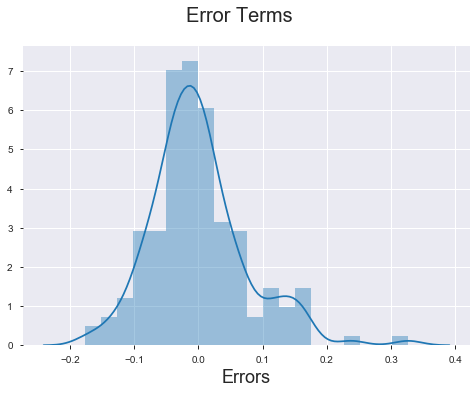

In [84]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

The error curve is almost normally distributed with mean at 0.0 approx, though we see some fluctuations in the tail

### Step 6:  Predictions using Final Model on Test Set

Now that we have the final model with us, we are to predict how the model behaves on the test set

#### Steps Involved:
1. We list the columns to consider in test data set in line with train data set
2. We scale using scaler.transform to scale the test data set 
3. We split the test dat set into X_test and y_test
4. Add constant to the X_test dataframe
5. Predict the results of test set using the final model that we have built, in this case `lm10`
6. Plot the y_test and y_pred in a scatter plot to establish whether they have linear relationship
7. Compute the R2 score for test data set and check whether the model is behaving good for test data set and it is not overfitting the train data set. That is Adjusted R2 is high for train data and very low for test data set

For this example, we consider that a difference of 5% between R2 of Train and R2 of Test as acceptable

In [85]:
#list the columns to consider
cols_to_consider_test = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'cylindernumber', 'enginesize', 'boreratio', 'horsepower', 'highwaympg','price']

In [86]:
#inspecting the shape
car_test.shape

(41, 47)

In [87]:
#scaling the test data using min max scaler
#Note that we are performing only transform and not fit_transform
car_test[cols_to_consider_test]= scaler.transform(car_test[cols_to_consider_test])

In [88]:
#describing the test data set after scaling
car_test.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,horsepower,highwaympg,price,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,Company_audi,Company_bmw,Company_buick,Company_chevrolet,Company_dodge,Company_honda,Company_isuzu,Company_jaguar,Company_mazda,Company_mercury,Company_mitsubishi,Company_nissan,Company_peugeot,Company_plymouth,Company_porsche,Company_renault,Company_saab,Company_subaru,Company_toyota,Company_volkswagen,Company_volvo
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.0,41.000000,41.000000,41.000000,41.000000,41.0,41.0,41.000000,41.000000,41.0,41.0,41.000000,41.000000,41.0,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.0,41.000000,41.000000,41.000000,41.000000,41.000000
mean,0.477544,0.599207,0.517683,0.536992,0.476215,0.241463,0.297561,0.618467,0.284959,0.315096,0.282376,0.926829,0.219512,0.097561,0.341463,0.463415,0.073171,0.414634,0.560976,0.024390,0.0,0.073171,0.731707,0.048780,0.097561,0.0,0.0,0.048780,0.073171,0.0,0.0,0.048780,0.024390,0.0,0.073171,0.024390,0.048780,0.073171,0.073171,0.048780,0.024390,0.0,0.073171,0.024390,0.195122,0.024390,0.121951
std,0.237096,0.202206,0.166533,0.190905,0.190466,0.102410,0.180215,0.229504,0.159654,0.168417,0.245496,0.263652,0.419058,0.300406,0.480091,0.504854,0.263652,0.498779,0.502433,0.156174,0.0,0.263652,0.448575,0.218085,0.300406,0.0,0.0,0.218085,0.263652,0.0,0.0,0.218085,0.156174,0.0,0.263652,0.156174,0.218085,0.263652,0.263652,0.218085,0.156174,0.0,0.263652,0.156174,0.401218,0.156174,0.331295
min,0.000000,0.056911,0.291667,0.158333,0.128394,0.200000,0.109434,-0.111111,0.083333,-0.027027,0.012542,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.320690,0.497561,0.408333,0.400000,0.347944,0.200000,0.184906,0.468254,0.154167,0.216216,0.105810,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.431034,0.570732,0.516667,0.591667,0.483320,0.200000,0.230189,0.682540,0.266667,0.297297,0.231539,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.610345,0.741463,0.575000,0.658333,0.603957,0.200000,0.320755,0.746032,0.404167,0.405405,0.333757,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.182759,1.089431,0.975000,0.908333,0.935609,0.600000,0.932075,0.888889,0.662500,0.810811,1.112855,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,0.0,0.0,1.000000,1.000000,0.0,0.0,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [89]:
#splitting into x and y_test
y_test = car_test.pop('price')
X_test = car_test

In [90]:
# Adding constant variable to test dataframe
X_test_m4 = sm.add_constant(X_test)

In [91]:
#Features used for prediction. This is in line with the features that we used in train data set to build our model
cols_for_pred = ['const','carwidth', 'enginelocation_rear', 'Company_bmw',
       'Company_buick', 'Company_jaguar']

In [92]:
#creating a new data frame consisting of predictor variables
X_test_final = X_test_m4[cols_for_pred]

In [93]:
# Making predictions using the final model

y_pred_final = lm10.predict(X_test_final)

Text(0, 0.5, 'y_pred')

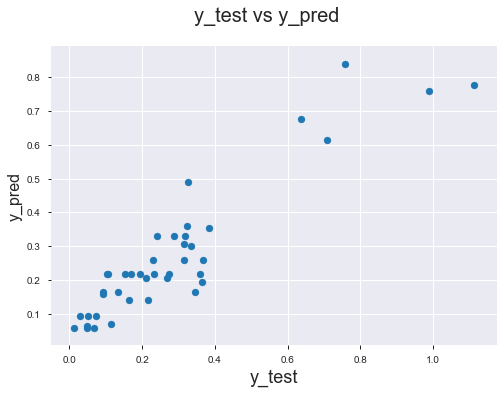

In [94]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_final)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)    

As seen from the above graph, the y_test and y_pred follow a linear plot

In [95]:
#importing r2_Score from metrics package to figure out the r2 score of test data set
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_final).round(2)

0.84

#### `Final Insights on Train and Test Data`

1. **The predicted R2 square comes to around 0.84 and the model's adjusted R-square comes around 0.871. The difference is around 0.03 or 3% and our model is decently behaving for train and test data set. Though we acknowledge that we could do better.**
<br>
2. **Probability of F-Statistics comes around 1.98e-68, which confirms the model is not built by chance.**
<br>
3. **AIC and BIC comes around -372 and -352 which also affirms the afore-mentioned statement**
<br>
4. **p-value of the features are 0.000 which is very less than the significant level (0.005), thereby indicating all the predictor variables are `STATISTICALLY SIGNIFICANT`**.